In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv(r"C:\Users\Luchiana\Downloads\archive\netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
#see the shape of the dataset
df.shape # --> from this we see that our dataset have 8807 rows and 12 columns

(8807, 12)

In [3]:
df.info() # --> see the structure of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.dtypes # --> see the datatypes of each column from the dataset

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
# see if we have duplicates in dataset
df.duplicated().sum()

0

In [6]:
# see if we have null values in dataset
df.isna().sum() #on rating we have 4 rows with null values, and on duration 3

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df[df['rating'].isna()] # see the rows that have null values in the rating column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [8]:
# because there are only 4 rows we will find the titles and replace the null values with the real values
df.loc[df['show_id'] == 's5990', 'rating'] = 'PG-13'
#df.loc[df['show_id'] == 's6828', 'rating'] = 'PG-13'
#df.loc[df['show_id'] == 's7313', 'rating'] = 'PG'
#df.loc[df['show_id'] == 's7538', 'rating'] = 'PG-13' 


In [9]:
df[df['show_id'].isin(['s5990','s6828','s7313','s7538'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,PG-13,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [10]:
df[df['rating'].isna()] #--> after replacing the NaN values we run 
                        #this command again to see if we still have null values in the rating column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             3
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df['director'] = df['director'].fillna('Unspecified')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['duration']= df['duration'].fillna(df['duration'].mode()[0])

In [13]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          3
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unspecified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unspecified,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
#let's replace that "s" in the show_id
df['show_id'] = df['show_id'].str.replace('s','')

In [16]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unspecified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unspecified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,Unspecified,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [17]:
#keep the first name that appears on cast column
df['cast'] = df['cast'].str.split(',').str[0]


In [18]:
df.rename(columns = {"cast":"main_actor"}, inplace = True)

In [8]:
df.rename(columns={"listed_in":"genre"}, inplace = True)

In [9]:
df['genre'] = df['genre'].str.split(',').str[0]

In [21]:
df[df['rating'].isin(['66 min','74 min','84 min'])]
#df.loc[df['show_id'] == '5542', 'rating'] = 'TV-MA'
#df.loc[df['show_id'] == '5795', 'rating'] = 'TV-MA'
#df.loc[df['show_id'] == '5814', 'rating'] = 'TV-MA'

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unspecified,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,Mark Ruffalo,United States,"November 20, 2019",2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,Unspecified,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,"November 1, 2019",2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,Tim Allen,United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."


In [41]:
#keep the first director before the comma
df[df['director'].str.contains(",",  case=False, na=False)]

filtered_rows = df[df['director'].str.contains(",", na=False)]

df.loc[filtered_rows.index, 'director'] = filtered_rows['director'].str.split(",", n=1).str[0]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [5]:
### EDA part

## Here we will asnwer on the question below:
#1. The total no of titles in the dataset
#2. How many moviews/ tv shows are?
#3. Percentage of moview/ tv shows from the total number of titles
#4. Ratings by type ( no of movies/tv shows per rating type)
#5. Titles by genre
#6. Titles by country <---asta pt maine
#7. Titles per duration (title per duration and type)
#8. A timeline on how many titles Netflix gathered from 2010 till now
 #-- let's get started
    
# 1. Total no of titles
total_titles= df['show_id'].count()
print('Our dataset contains a total number of ' + total_titles.astype(str) + ' titles')

Our dataset contains a total number of 8807 titles


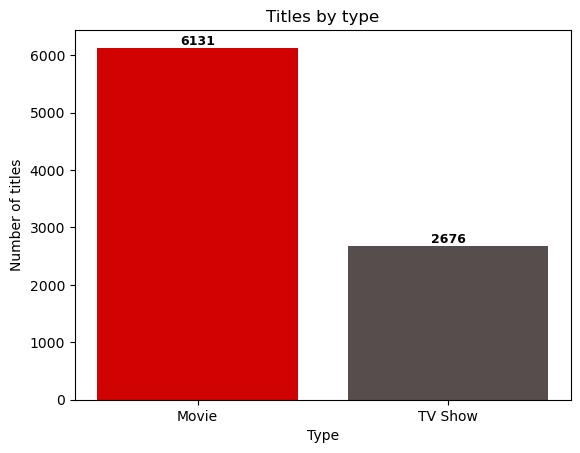

In [36]:
# 2.How many moviews/ tv shows are?

df_type = pd.DataFrame(df.groupby('type')['show_id'].count()).reset_index()
df_type.columns = ['Type','Number of titles']

vals = pd.Series(df_type['Number of titles'].values)

colors=['#D00202', '#564d4d']
plt.bar(df_type['Type'],height = df_type['Number of titles'], color = colors)
plt.xlabel('Type')
plt.ylabel('Number of titles')
plt.title('Titles by type')

for index,value in enumerate(vals):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize= 9, fontweight='semibold')
    
plt.show()

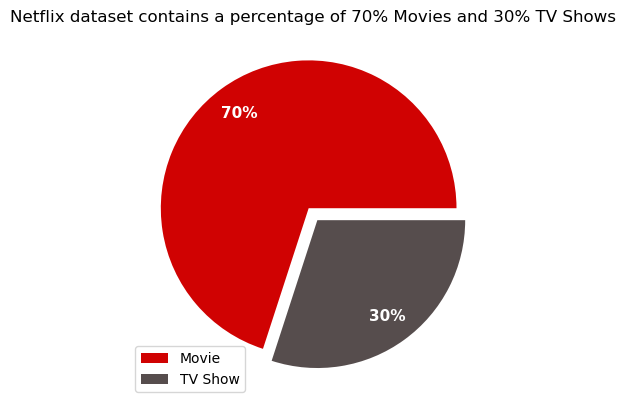

In [8]:
#3. Percentage of moview/ tv shows from the total number of titles

movies_percentage = ((df[df['type'] == 'Movie']['show_id'].count() / total_titles) * 100).round(0).astype(str)
tv_shows_percentage = ((df[df['type'] == 'TV Show']['show_id'].count() / total_titles) * 100).round(0).astype(str)

colors=['#D00202', '#564d4d']
slices = np.array([movies_percentage,tv_shows_percentage])
pie_labels=["Movie","TV Show"]
explode = (0.05, 0.05)
plt.pie(slices, labels=pie_labels , autopct='%1.0f%%', colors= colors, explode=explode, pctdistance=0.80, textprops={'color': 'white',  'weight': 'bold', 'fontsize': 11})

#centre_circle = plt.Circle((0, 0), 0.70, fc='white')
#fig = plt.gcf()
#fig.gca().total_titles(centre_circle)

plt.legend(labels=pie_labels, loc='lower left')
plt.title('Netflix dataset contains a percentage of ' + '%d' %movies_percentage.astype(float) + '% Movies and ' + '%d' %tv_shows_percentage.astype(float) + '% TV Shows')
plt.show()

In [66]:
#4. Ratings by type ( no of movies/tv shows per rating type) --aici am depistat ca sunt date gresite si partea asta cu 
                                    # cu cea in care fac replace la valori o duc la data cleaning
df.groupby(['rating','type'])['show_id'].count()

rating    type   
66 min    Movie         1
74 min    Movie         1
84 min    Movie         1
G         Movie        41
NC-17     Movie         3
NR        Movie        75
          TV Show       5
PG        Movie       287
PG-13     Movie       491
R         Movie       797
          TV Show       2
TV-14     Movie      1427
          TV Show     733
TV-G      Movie       126
          TV Show      94
TV-MA     Movie      2062
          TV Show    1145
TV-PG     Movie       540
          TV Show     323
TV-Y      Movie       131
          TV Show     176
TV-Y7     Movie       139
          TV Show     195
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         3
Name: show_id, dtype: int64

In [2]:
df[df['rating'].isin(['66 min','74 min','84 min'])] #duc la data cleaning

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [3]:
#df.loc[df['show_id'] == '5542', 'rating'] = 'TV-MA'   #duc la data cleaning
#df.loc[df['show_id'] == '5795', 'rating'] = 'TV-MA'
#df.loc[df['show_id'] == '5814', 'rating'] = 'TV-MA'

In [5]:
df[df['show_id'].isin(['s5542','s5795','s5814'])] #duc la data cleaning

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [93]:
#4. Ratings by type ( no of movies/tv shows per rating type)
df_titles_by_rating_and_type = pd.DataFrame(df.groupby(['rating','type'])['show_id'].count()) #duc la data cleaning--pt verificare
df_titles_by_rating_and_type

show_id
rating   type            
G        Movie         41
NC-17    Movie          3
NR       Movie         75
         TV Show        5
PG       Movie        287
PG-13    Movie        491
R        Movie        797
         TV Show        2
TV-14    Movie       1427
         TV Show      733
TV-G     Movie        126
         TV Show       94
TV-MA    Movie       2065
         TV Show     1145
TV-PG    Movie        540
         TV Show      323
TV-Y     Movie        131
         TV Show      176
TV-Y7    Movie        139
         TV Show      195
TV-Y7-FV Movie          5
         TV Show        1
UR       Movie          3

In [14]:
#5. Titles by genre (top 5)
df_movies_by_genre = pd.DataFrame(df.groupby('genre')['show_id'].count()).reset_index()
df_movies_by_genre.columns = ['genre','titles_number']
df_movies_by_genre = df_movies_by_genre.sort_values('titles_number',ascending=False).head(5)

df_movies_by_genre['color'] = df_movies_by_genre['titles_number'].apply(lambda x:'#564d4d' if x < 1000 else '#D00202')

df_movies_by_genre

,genre,titles_number,color
12,Dramas,1600,#D00202
7,Comedies,1210,#D00202
0,Action & Adventure,859,#564d4d
10,Documentaries,829,#564d4d
16,International TV Shows,774,#564d4d


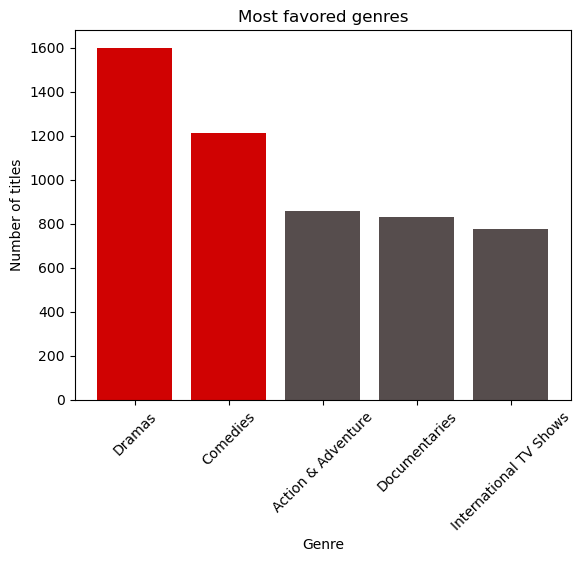

In [17]:

plt.bar(df_movies_by_genre['genre'],df_movies_by_genre['titles_number'], color = df_movies_by_genre['color'])
plt.xlabel('Genre')
plt.ylabel('Number of titles')
plt.title('Most favored genres')
plt.xticks(rotation = 45)
plt.show()

In [90]:
pd.set_option('display.max_rows', 9999)

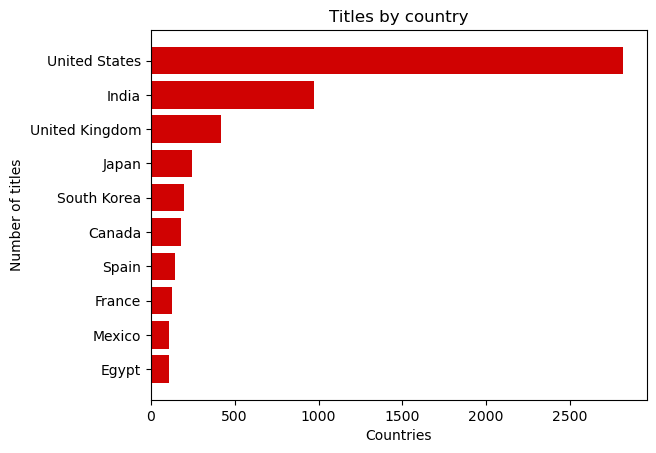

In [10]:
#6. Titles by country 

df_titles_by_country = df.groupby('country')['show_id'].count().reset_index()
df_titles_by_country.columns = ['country', 'title no']

#--keep the first value before the comma
#-- replace the comma 
# Extract the first value before the first comma

df_titles_by_country['country'] = df_titles_by_country['country'].str.split(',').str[-1]
df_titles_by_country = df_titles_by_country.sort_values(by='title no', ascending= False).head(10)
top_10_countries_desc = df_titles_by_country.sort_values(by='title no', ascending=True)

plt.barh(top_10_countries_desc['country'], top_10_countries_desc['title no'], color='#D00202')
plt.xlabel('Countries')
plt.ylabel('Number of titles')
plt.title('Titles by country')

plt.show()

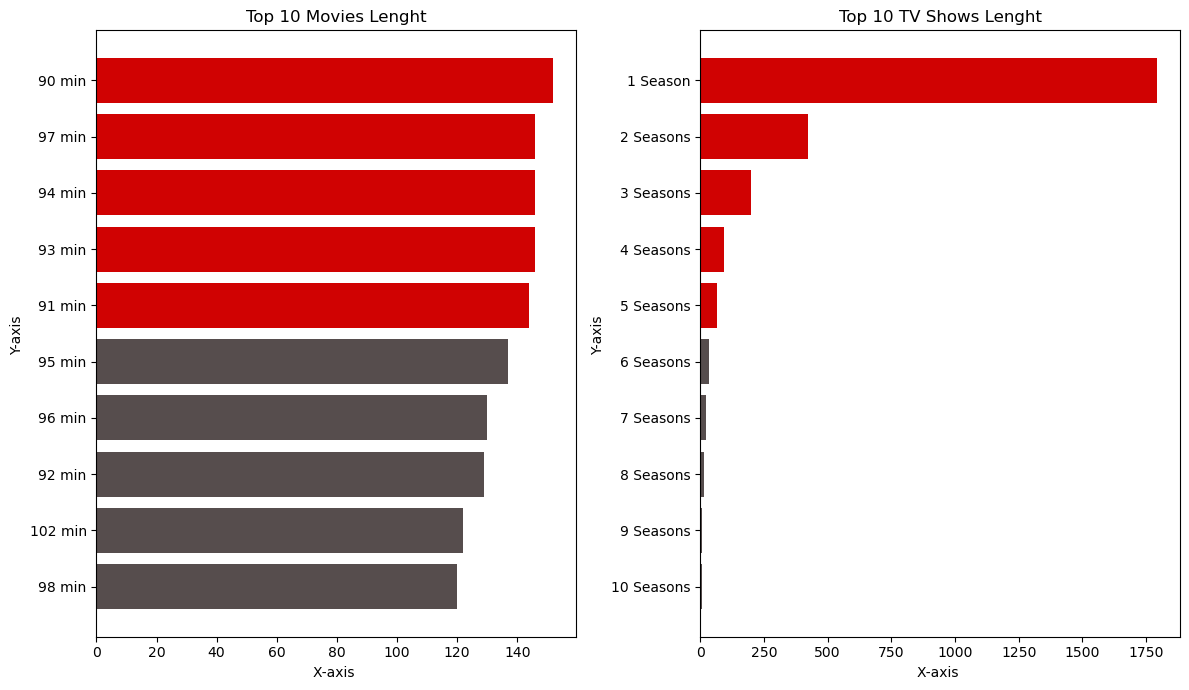

In [36]:
#7. Titles per duration (title per duration and type) 

df_titles_by_duration = pd.DataFrame(df.groupby(['type','duration'])['show_id'].count()).reset_index()
df_titles_by_duration.columns = ['type','duration','number of titles']
df_titles_by_duration

movies_data = df_titles_by_duration[df_titles_by_duration['type'] == 'Movie']
movies_data_sorted = movies_data.sort_values(by='number of titles', ascending= False).head(10)# de revenit cu sortarea
top_10_movies_desc = movies_data_sorted.sort_values(by='number of titles', ascending=True)

tv_shows_data = df_titles_by_duration[df_titles_by_duration['type']=='TV Show']
tv_show_data_sorted = tv_shows_data.sort_values(by='number of titles', ascending= False).head(10)
top_10_tv_show_desc = tv_show_data_sorted.sort_values(by='number of titles', ascending=True)

colors_movies = top_10_movies_desc['number of titles'].apply(lambda y: '#564d4d' if y < 140 else '#D00202')
colors_tv_shows = top_10_tv_show_desc['number of titles'].apply(lambda y: '#564d4d' if y < 50 else '#D00202')

plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.barh(top_10_movies_desc['duration'], top_10_movies_desc['number of titles'], color=colors_movies)
plt.title("Top 10 Movies Lenght")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
plt.barh(top_10_tv_show_desc['duration'], top_10_tv_show_desc['number of titles'], color=colors_tv_shows)
plt.title("Top 10 TV Shows Lenght")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.tight_layout()
plt.show()

In [25]:
top_10_movies_desc[top_10_movies_desc['number of titles'] < 100]

,type,duration,number of titles
203,Movie,98 min,120
3,Movie,102 min,122
197,Movie,92 min,129
201,Movie,96 min,130
200,Movie,95 min,137
196,Movie,91 min,144
198,Movie,93 min,146
199,Movie,94 min,146
202,Movie,97 min,146
195,Movie,90 min,152


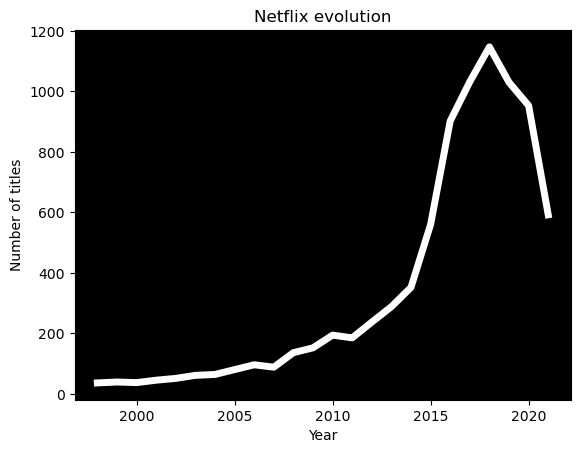

In [33]:
#8. A timeline on how many titles Netflix gathered from 2010 till now

df_titles_per_year = df.groupby('release_year')['show_id'].count().reset_index()
df_titles_per_year.columns = ['Year','Number of titles']

df_titles_after_1997 = df_titles_per_year[(df_titles_per_year['Year'] > 1997)]

plt.plot(df_titles_after_1997['Year'], df_titles_after_1997['Number of titles'], color='white',linewidth=5)
plt.xlabel('Year')

plt.ylabel('Number of titles')
plt.title('Netflix evolution')
plt.gca().set_facecolor('black')
plt.show()


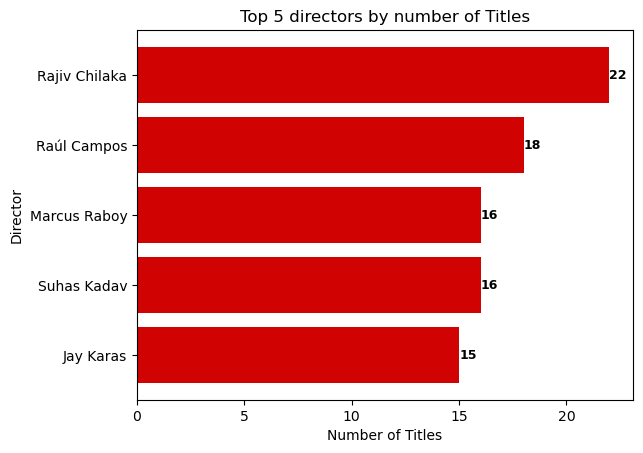

In [42]:
titles_per_director = df.groupby('director')['show_id'].count().astype(int).reset_index()
titles_per_director.columns = ['Director','Titles No']

director_titles = titles_per_director.sort_values(['Titles No','Director'], ascending=False).head()
director_titles = director_titles.sort_values('Titles No', ascending = True)
plt.barh(director_titles['Director'], director_titles['Titles No'], color = '#D00202')
plt.title('Top 5 directors by number of Titles')
plt.ylabel('Director')
plt.xlabel('Number of Titles')


for index,value in enumerate(director_titles['Titles No']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize= 9, fontweight='semibold')

plt.show()
